# Using the Open FDA 

This example shows how to use a REST API to retrieve information.  The example uses the [Open FDA](https://open.fda.gov/api/reference/) API. The goal is to retrieve adverse event information from the API, and then plot the information for different drugs. 

In the first step we import the modules that we will need.  The *json* module, allows us to read [JSON](http://www.json.org/), *urllib2* allows us to download data from a URL, *pandas* is a data analysis library, and *matplotlib.pyplot* a plotting library. 

In [22]:
# utility to read json format
import json as js
# urllib2 is a module for fetching URL (Uniform Resource Locator) data
import urllib2 as ulib
import pandas as pd
import matplotlib.pyplot as plt

In the next step we form a request string and download the data as JSON. 

In [5]:
# form a request
request_string='https://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:aspirin&count=patient.reaction.reactionmeddrapt.exact'

import ssl

# to get around https error as described here 
# http://stackoverflow.com/questions/27835619/ssl-certificate-verify-failed-error
# This restores the same behavior as before.
context = ssl._create_unverified_context()
response=ulib.urlopen(request_string,context=context)

print "response: ",response
print "type of response: ",type(response)

# load as json
fda_data=js.load(response)

fda_data

response:  <addinfourl at 139882078724536 whose fp = <socket._fileobject object at 0x7f38d59c72d0>>
type of response:  <type 'instance'>


{u'meta': {u'disclaimer': u'openFDA is a beta research project and not for clinical use. While we make every effort to ensure that data is accurate, you should assume all results are unvalidated.',
  u'last_updated': u'2016-03-25',
  u'license': u'http://open.fda.gov/license'},
 u'results': [{u'count': 12349, u'term': u'DYSPNOEA'},
  {u'count': 12061, u'term': u'NAUSEA'},
  {u'count': 10734, u'term': u'DIZZINESS'},
  {u'count': 10652, u'term': u'FATIGUE'},
  {u'count': 10491, u'term': u'FLUSHING'},
  {u'count': 9311, u'term': u'DIARRHOEA'},
  {u'count': 9058, u'term': u'DRUG INEFFECTIVE'},
  {u'count': 8473, u'term': u'MYOCARDIAL INFARCTION'},
  {u'count': 8412, u'term': u'ASTHENIA'},
  {u'count': 8189, u'term': u'HEADACHE'},
  {u'count': 7313, u'term': u'FALL'},
  {u'count': 7279, u'term': u'PAIN'},
  {u'count': 7194, u'term': u'VOMITING'},
  {u'count': 7071, u'term': u'PRURITUS'},
  {u'count': 6896, u'term': u'CHEST PAIN'},
  {u'count': 6069, u'term': u'ANAEMIA'},
  {u'count': 5987, 

Here we take a look at the *type* of the *fda_data* variable

In [6]:
type(fda_data)

dict

The *type* is a *dict*.  To retrieve information from a *dict* we need to know which keys are in the dict.  The below code prints out the keys of the *dict*.

In [8]:
for key, value in fda_data.iteritems() :
    print key

meta
results


Get the *results* from the dictionary.

In [13]:
results=fda_data['results']

Take a look at the *type* of the results. It is a list.  Print out the first 5 entries in the list. 

In [14]:
type(results)

for i in range(0,5):
    print results[i]

{u'count': 12349, u'term': u'DYSPNOEA'}
{u'count': 12061, u'term': u'NAUSEA'}
{u'count': 10734, u'term': u'DIZZINESS'}
{u'count': 10652, u'term': u'FATIGUE'}
{u'count': 10491, u'term': u'FLUSHING'}


It is convenient to have the data as a *Pandas* *DataFrame*.  Run a test to see if we can convert the list to a data frame. 

In [15]:
test=pd.DataFrame(results)
test.head()

,count,term
0,12349,DYSPNOEA
1,12061,NAUSEA
2,10734,DIZZINESS
3,10652,FATIGUE
4,10491,FLUSHING


Now we can combine the above steps into a function.  This will make it easier to retrieve data for different drug names over and over again. 

In [18]:
# form a request
def getDrugData(drugname):
    request_string='https://api.fda.gov/drug/event.json?search=patient.drug.medicinalproduct:'+drugname+'&count=patient.reaction.reactionmeddrapt.exact'
    response=ulib.urlopen(request_string, context=context)
    
    # load as json
    fda_data=js.load(response)['results']
    
    # make it a dataframe
    fda_data=pd.DataFrame(fda_data)

    # make drug term the index and return
    return fda_data.set_index('term')



Now we can use our function, defined above, to retrieve adverse event information for two different drugs and plot the result.  

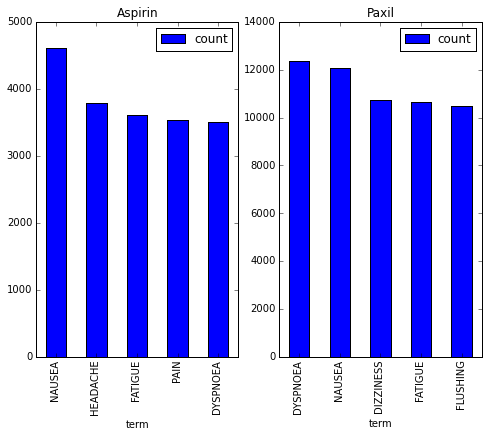

In [21]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
drugname1='tylenol'
drugname2='aspirin'

data1=getDrugData(drugname1)
data2=getDrugData(drugname2)

fig=plt.figure(figsize=(8, 6))

ax1=plt.subplot(121)
ax2=plt.subplot(122)

data1.iloc[0:5].plot.bar(ax=ax1)
data2.iloc[0:5].plot.bar(ax=ax2)

ax1.set_title("Aspirin")
ax2.set_title("Paxil")